In [85]:
import numpy
from matplotlib import pyplot
from math import pi
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [108]:
nx = 100
ny = 5

Lx = 1
Ly = .05

dx = Lx/(nx-1)
dy = Ly/(ny-1)

#boundary conditions
aBC = 1
bBC = 1

#diffusion speed
T = 600
x = 0.5
Du = 1.37/pi/pi*x**2 /T
Dv = 1.37/pi/pi*(1-x)**2 /T


dt = .5 * min(dx, dy)**2 / (4*max(Du,Dv))

nt = int(T/dt)
print(nt, dx, dy
     )

2720 0.010101010101010102 0.0125


In [109]:
U = numpy.zeros((ny, nx))
V = numpy.zeros((ny, nx))
P = numpy.zeros((ny, nx))
print(U[0, 0])

0.0


In [110]:
def evolve(u, v, p, nt, dt, dx, dy, Du, Dv, aBC, bBC):
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        pn = p.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + Du*dt*(1/dy/dy* (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[:-2,1:-1]) + 1/dx/dx* (un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,:-2])) - dt*(un[1:-1,1:-1]*vn[1:-1,1:-1]) #nonlinear + feed/kill part
        v[1:-1,1:-1] = vn[1:-1,1:-1] + Dv*dt*(1/dy/dy* (vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[:-2,1:-1]) + 1/dx/dx* (vn[1:-1,2:] - 2*vn[1:-1,1:-1] + vn[1:-1,:-2])) - dt*(un[1:-1,1:-1]*vn[1:-1,1:-1])
        p[1:-1,1:-1] = pn[1:-1,1:-1] + dt*un[1:-1,1:-1]*vn[1:-1,1:-1]
        
        # Enforce Dirichlet BC's
        u[:,0] = aBC
        u[:,-1] = 0
        v[:,0] = 0
        v[:,-1] = bBC
        
        #enforce Neumann BC's
        u[0,:] = u[1,:]
        u[-1,:] = u[-2,:]
        
        v[0,:] = v[1,:]
        v[-1,:] = v[-2,:]
        
        p[0,:] = p[1, :]
        p[-1,:] = p[-2,:]
        p[:,0] = p[:,1]
        p[:,-1] = p[:,-2]
        
        
        
    return v

In [111]:
result = evolve(U, V, P, nt, dt, dx, dy, Du, Dv, aBC, bBC)

0.488093410962 0.18181818181818182


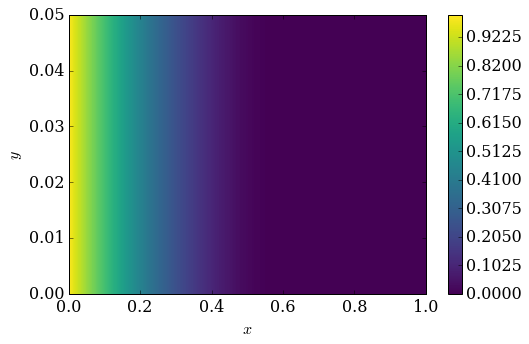

In [112]:
#printing solution
x = numpy.linspace(0,Lx,nx)
y = numpy.linspace(0,Ly,ny)
pyplot.figure(figsize=(8,5))
pyplot.contourf(x, y,U,400,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

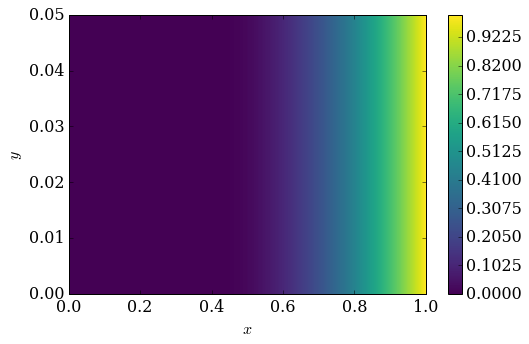

In [113]:
x = numpy.linspace(0,Lx,nx)
y = numpy.linspace(0,Ly,ny)
pyplot.figure(figsize=(8,5))
pyplot.contourf(x, y,V,400,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

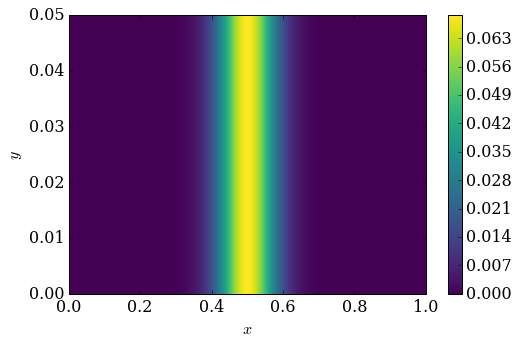

In [114]:
x = numpy.linspace(0,Lx,nx)
y = numpy.linspace(0,Ly,ny)
pyplot.figure(figsize=(8,5))
pyplot.contourf(x, y,P,400,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();